In [1]:
import numpy as np
from sklearn.utils import shuffle
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2 as cv
import PIL
from PIL import Image
import math
import pandas as pd
import time
from sklearn.manifold import TSNE

# load CNN features trained on vgg localization task. 
file_name = 'vgg_localization_feat.npz'
feat = np.load(file_name)
feat = feat['feat']  # 2222 * 512. 

# prepare social feature scores and file names on the 2222 images.
df = pd.read_pickle('keep_list')  # keep_list stores the more consistent social feature scores and image filenames. 
#keep_list = ['Filename', 'attractive', 'caring', 'aggressive', 'kind', 'sociable', 'happy', 'mean', 'responsible',
#            'cold', 'trustworthy', 'friendly']

In [8]:
# run tSNE on the features, get an embedding, then color it with different scores. 
# then embed images on to the plot and see actual pattern changes of faces. 
from sklearn.manifold import TSNE
model = TSNE(n_components=3, random_state=0)
x_new = model.fit_transform(feat)

In [9]:
x_new.shape

(2222, 3)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

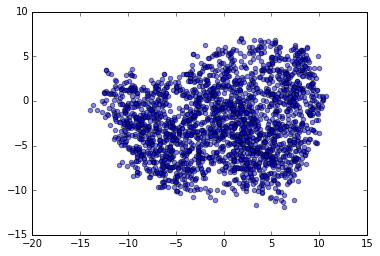

In [10]:
plt.scatter(x_new[:,0], x_new[:,1], alpha=0.5)

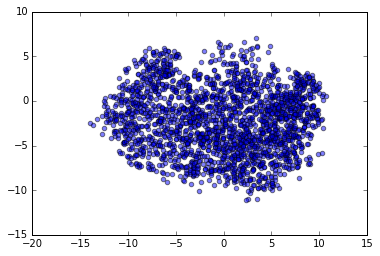

In [23]:
plt.scatter(x_new[:,0], x_new[:,2], alpha=0.5)
plt.savefig('test')

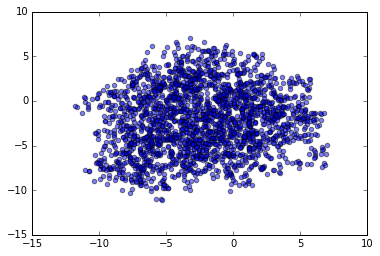

In [12]:
plt.scatter(x_new[:,1], x_new[:,2], alpha=0.5)

In [13]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
x_new2 = model.fit_transform(feat)

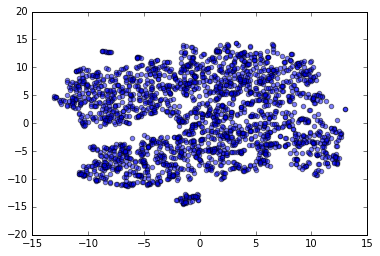

In [14]:
plt.scatter(x_new2[:,0], x_new2[:,1], alpha=0.5)

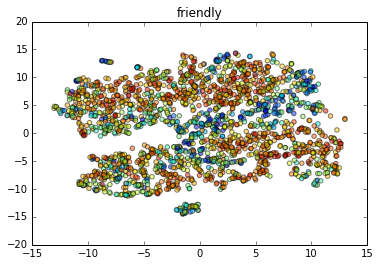

In [19]:
key_word = 'friendly'
colors = df[key_word]
plt.scatter(x_new2[:,0], x_new2[:,1], c=colors, alpha=0.5)
plt.title(key_word)
plt.show()

In [24]:
def feat_colored_embedding(key_word):
    colors = df[key_word]
    plt.scatter(x_new2[:,0], x_new2[:,1], c=colors, alpha=0.5)
    plt.title(key_word)
    plt.show()
    plt.savefig(key_word)
    return 

In [25]:
keep_list = ['attractive', 'caring', 'aggressive', 'kind', 'sociable', 'happy', 'mean', 'responsible', 'cold', 'trustworthy', 'friendly']

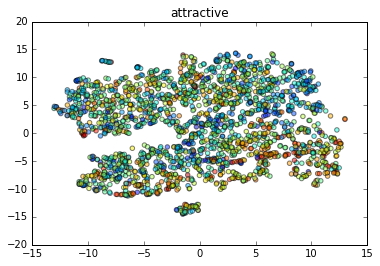

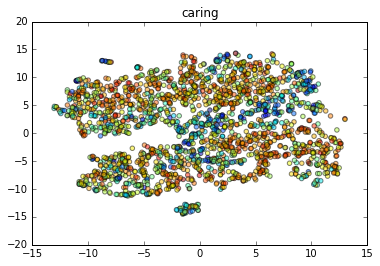

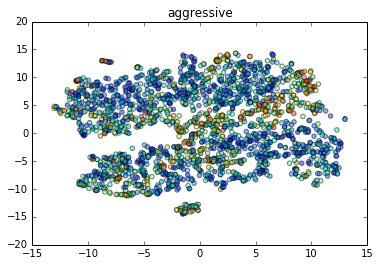

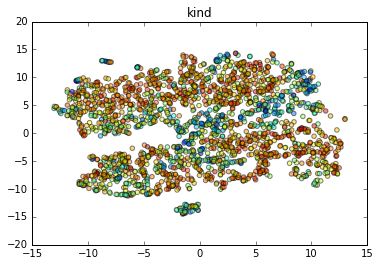

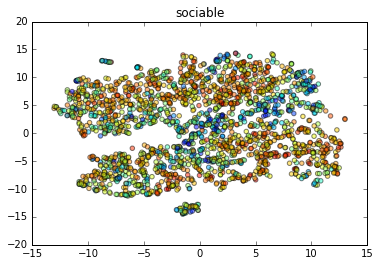

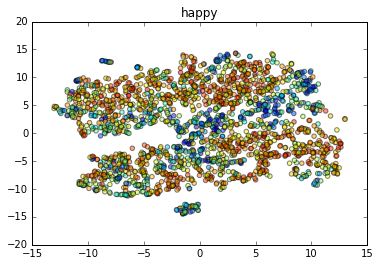

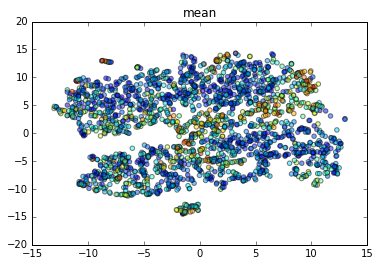

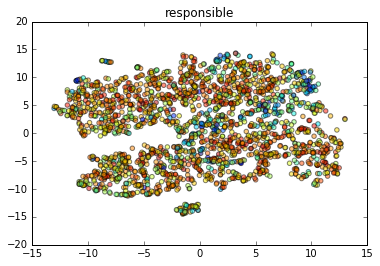

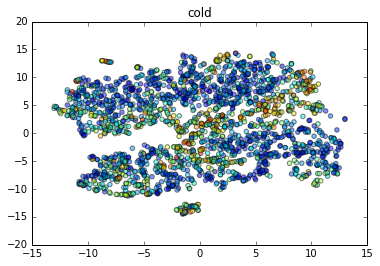

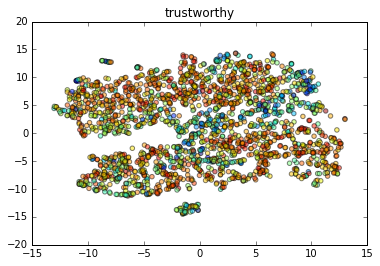

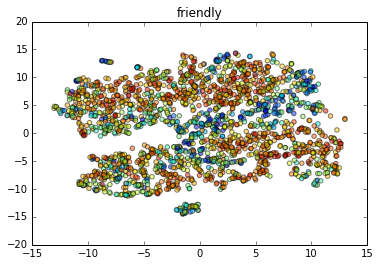

In [26]:
for cur_feat in keep_list:
    feat_colored_embedding(cur_feat)

In [27]:
x_new2.shape

(2222, 2)

In [28]:
x_new2.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [29]:
np.save('tsne2D', x_new2)